# Analise da frequência de Entidades Nomeadas

Alunos: Arthur B. Pinotti, Eduardo Brandt, Henrique F. de Azevedo, Kaue Reblin, Luiz G. Klitzke

In [1]:
# Instalação das bibliotecas e modelos de linguagem
!pip install stanza
!pip install spacy-stanza

!python -m spacy download en_core_web_lg

  Obtaining dependency information for stanza from https://files.pythonhosted.org/packages/ca/a4/8e66af3775e87ef2369547c8ce95ae1baf2d2e5fca0ef2c0f38ec91ac001/stanza-1.9.2-py3-none-any.whl.metadata
  Using cached stanza-1.9.2-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/ef/56/4ddf8b36aa4b52077045b17ffb8958f3360b250df4143d1482d9d5bb54d5/emoji-2.14.0-py3-none-any.whl.metadata
  Using cached emoji-2.14.0-py3-none-any.whl.metadata (5.7 kB)
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for torch>=1.3.0 from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Usi


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for spacy-stanza from https://files.pythonhosted.org/packages/dd/e1/d38eff51089bba011c13cf181c2d0e8358c10e00752f397fd27147ad8e6e/spacy_stanza-1.0.4-py3-none-any.whl.metadata
  Using cached spacy_stanza-1.0.4-py3-none-any.whl.metadata (8.6 kB)
  Obtaining dependency information for stanza<1.7.0,>=1.2.0 from https://files.pythonhosted.org/packages/88/4f/064015f46172c860b02148db65acd67e4925900b426f66cd0f5729d1c0d1/stanza-1.6.1-py3-none-any.whl.metadata
  Using cached stanza-1.6.1-py3-none-any.whl.metadata (13 kB)
Using cached spacy_stanza-1.0.4-py3-none-any.whl (9.7 kB)
Using cached stanza-1.6.1-py3-none-any.whl (881 kB)
  Attempting uninstall: stanza
    Found existing installation: stanza 1.9.2
    Uninstalling stanza-1.9.2:
      Successfully uninstalled stanza-1.9.2



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     -------------------------------------- 0.0/400.7 MB 326.8 kB/s eta 0:20:26
     ---------------------------------------- 0.2/400.7 MB 1.3 MB/s eta 0:05:07
     --------------------------------------- 2.1/400.7 MB 11.1 MB/s eta 0:00:37
      -------------------------------------- 6.0/400.7 MB 27.2 MB/s eta 0:00:15
      -------------------------------------- 6.0/400.7 MB 22.4 MB/s eta 0:00:18
      -------------------------------------- 6.1/400.7 MB 18.4 MB/s eta 0:00:22
      -------------------------------------- 6.3/400.7 MB 16.7 MB/s eta 0:00:24
      -------------------------------------- 6.6/400.7 MB 16.3 MB/s eta 0:00:25
      -------------------------------------- 7.4/400.7 MB 15.7 MB/s eta 0:00:26
      -------------------------------------- 8.5/400.7 MB 16.5 MB/s eta 0:00:24
      -------------------------------------- 9.8/400.7


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importações
import spacy
import stanza
import spacy_stanza
from spacy import displacy

from graphviz import Digraph
from IPython.display import Image

# Manipulação de Dados
import pandas as pd

## Carregamento e Processamento de Texto

In [19]:
import csv

# Criação de listas para armazenar os dados que entrarão no DataFrame
documentos                   = []
textos_brutos                = []
textos_processados           = []
textos_processados_sem_split = []

# Etapa 2: Iterar pelos arquivos e ler o conteúdo
with open("DadosMinerados.csv", "r", encoding='utf-8') as infile:
    reader = csv.reader(infile, delimiter=',')

    # Pular os headers
    next(reader, None)  # skip the headers

    for row in reader:
        documentos.append(row[0])
        textos_brutos.append(row[1].replace("\n", "")) #Precisamos remover os \n para não sujar a saída
        textos_processados.append(row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", "").split())
        textos_processados_sem_split.append(row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", ""))

# Etapa 3: Criar o DataFrame
df = pd.DataFrame({
    'documento'                 : documentos,
    'texto_bruto'               : textos_brutos,
    'texto_processado'          : textos_processados,
    'texto_processado_sem_split': textos_processados_sem_split,
})

# Visualizar o DataFrame
df

,documento,texto_bruto,texto_processado,texto_processado_sem_split
0,acid-splash,Acid SplashSource: Player's HandbookConjuratio...,"[acid, splash, source, players, handbook, conj...",acid splash source players handbook conjuratio...
1,blade-ward,Blade WardSource: Player's HandbookAbjuration ...,"[blade, ward, source, players, handbook, abjur...",blade ward source players handbook abjuration ...
2,booming-blade,Booming BladeSource: Tasha's Cauldron of Every...,"[booming, blade, source, tashas, cauldron, eve...",booming blade source tashas cauldron everythin...
3,chill-touch,Chill TouchSource: Player's HandbookNecromancy...,"[chill, touch, source, players, handbook, necr...",chill touch source players handbook necromancy...
4,control-flames,Control FlamesSource: Xanathar's Guide to Ever...,"[control, flames, source, xanathars, guide, ev...",control flames source xanathars guide everythi...
...,...,...,...,...
575,time-stop,Time StopSource: Player's Handbook9th-level tr...,"[time, stop, source, players, handbook, 9thlev...",time stop source players handbook 9thlevel tra...
576,true-polymorph,True PolymorphSource: Player's Handbook9th-lev...,"[true, polymorph, source, players, handbook, 9...",true polymorph source players handbook 9thleve...
577,true-resurrection,True ResurrectionSource: Player's Handbook9th-...,"[true, resurrection, source, players, handbook...",true resurrection source players handbook 9thl...
578,weird,WeirdSource: Player's Handbook9th-level illusi...,"[weird, source, players, handbook, 9thlevel, i...",weird source players handbook 9thlevel illusio...


Vamos carregar toda a base de textos em um único documento para obter suas entidades.

In [20]:
general_text = ""

for text_en in textos_brutos:
  general_text += text_en

print("Tamanho do texto geral: " + str(len(general_text)))

Tamanho do texto geral: 599582


In [9]:
# Carrega o modelo de inglês
nlp_en = spacy.load('en_core_web_lg')

In [21]:
# Processa o texto
doc_en = nlp_en(general_text)

### Named Entity Recognition

In [38]:
print(f"Quantidade de entidades nomeadas: {len(doc_en.ents)}\n")

# Inicializando o mapa para agrupar entidades por label
entidades_por_label = {}

# Iterando pelas entidades nomeadas obtidas
for ent in doc_en.ents:
    label = ent.label_  # Obtém o label da entidade
    texto = ent.text    # Obtém o texto da entidade
    
    # Adiciona a entidade ao grupo correspondente no dicionário
    if label not in entidades_por_label:
        entidades_por_label[label] = []  # Cria uma lista se o label não existir
    entidades_por_label[label].append(texto)

# Ordenando as labels por quantidade de ocorrências
labels_ordenados = sorted(entidades_por_label.items(), key=lambda item: len(item[1]), reverse=True)

# Dicionário de descrições para as labels
descricao_labels = {
    "ORG": "Refere-se a organizações, como empresas, agências governamentais e instituições. Exemplo: Apple como uma organização.",
    "GPE": "Identifica entidades geopolíticas, como países, estados, cidades e regiões que têm fronteiras reconhecidas. Exemplo: U.K. como uma entidade geopolítica.",
    "MONEY": " Indica quantias em dinheiro, incluindo a moeda e o valor. Exemplo: $1 billion representa uma quantidade monetária.",
    
    "PERSON": "Nome de uma pessoa específica. Exemplo: Albert Einstein",
    "DATE": "Datas específicas, como dias, meses, anos ou períodos. Exemplo: January 2022 ou yesterday",
    "TIME": "Expressões de tempo mais detalhadas, como horas do dia ou períodos específicos. Exemplo: 5 p.m..",
    "LOC": "Locais geográficos que não são considerados entidades geopolíticas, como mares, montanhas, e outras características geográficas. Exemplo: Mount Everest.",
    "PERCENT": "Representa porcentagens, incluindo o sinal de porcentagem. Exemplo: 15%.",
    "QUANTITY": "Quantidades ou medidas, geralmente acompanhadas de unidades, que não representam dinheiro. Exemplo: 200 kilometers.",
    "PRODUCT": "Refere-se a nomes de produtos, como dispositivos, veículos e tecnologias. Exemplo: iPhone.",
    "EVENT": "Eventos específicos, como guerras, competições, desastres naturais, entre outros. Exemplo: World War II.",
    "WORK_OF_ART": "Obras de arte como livros, músicas, filmes e outras criações artísticas. Exemplo: Mona Lisa.",
    "LAW": "Nomes de leis, tratados e documentos legais. Exemplo: Constitution of the United States.",
    "LANGUAGE": "Nomes de idiomas.",
    "FAC": "Edifícios, aeroportos, rodovias, pontes, etc.",
    "NORP": "Nacionalidades ou grupo políticos ou religiosos.",
    "ORDINAL": "Indentificação de ordem, como: first, second",
    "CARDINAL": "Números que não se encaixam em outra categoria anterior.",
}

# Exibindo o resultado
for label, entidades in labels_ordenados:
    print(f"Label: {label} | Quantidade de ocorrências: {len(entidades)}")
    print(f"Descrição: {descricao_labels.get(label)}")

    entidades_unicas = set(entidades)
    print(f"Entidades únicas({len(entidades_unicas)}): {', '.join(entidades_unicas)} \n")

Quantidade de entidades nomeadas: 6495

Label: CARDINAL | Quantidade de ocorrências: 2801
Descrição: Números que não se encaixam em outra categoria anterior.
Entidades únicas(224): five, 200, at least 150, 3d10, up to 25,000, 1d10.At, one-eighth, at least 1000, 5d12, 6d6, 24, 5d10, 78, two, 50 + 10, at least 300, one hundred, 2Moderate, Three, half, 10d10, 2d8, 1 hourYou, up to fifteen, 7, no more than 5 feet, 70, 7d6, 3Overcast, up to six, more than one, Up to 10, 6thSpeed, 3d4.Spell, Hundreds, 5, at least 600, no more than ten, 1d4 + 3 +, 36, twenty-five, four, 2d6, 7d10, at least 1, 1d6 + 3 +, 2d10, at least 2000, 4d10, an additional 5, less than 16, 18Small2516, 60, 1d10 + 3 +, 500lbs, 1d12, 1 minute40, 10.Spell, 1 +, 2HotStage, 6d8, 8 hoursYou, 2Light, 2, more than nine, Up to 8 hoursYou, 12, 0, 2d6 + 2 +, 4, up to five, up to twenty-five, at least 200, twenty, 150, six, One, 26, +2, ten, 1d6, no more than 10 feet, at least 1,000, one 150, at least 500, 300, 12Large5010, 5d8.Spell

### Visualizando melhor as quantidades por cada label

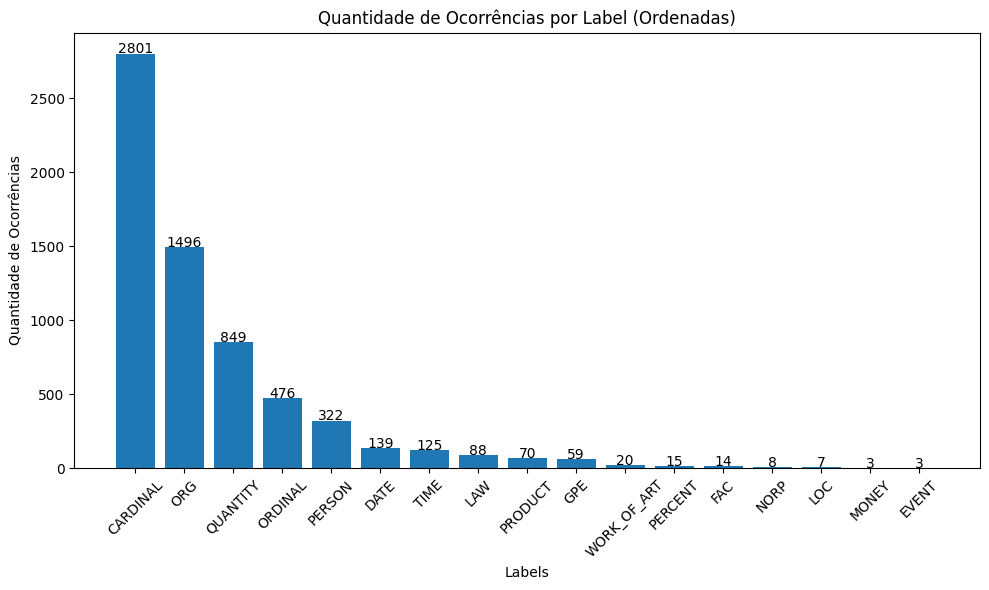

In [41]:
import matplotlib.pyplot as plt

# Separar labels e quantidades após a ordenação
labels = [item[0] for item in labels_ordenados]
quantidades = [len(item[1]) for item in labels_ordenados]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, quantidades)

# Configurar o título e os rótulos dos eixos
plt.title("Quantidade de Ocorrências por Label (Ordenadas)")
plt.xlabel("Labels")
plt.ylabel("Quantidade de Ocorrências")

# Girar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Adicionar os valores no topo de cada barra
for i, quantidade in enumerate(quantidades):
    plt.text(i, quantidade + 0.5, str(quantidade), ha='center', fontsize=10)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Interpretação dos dados